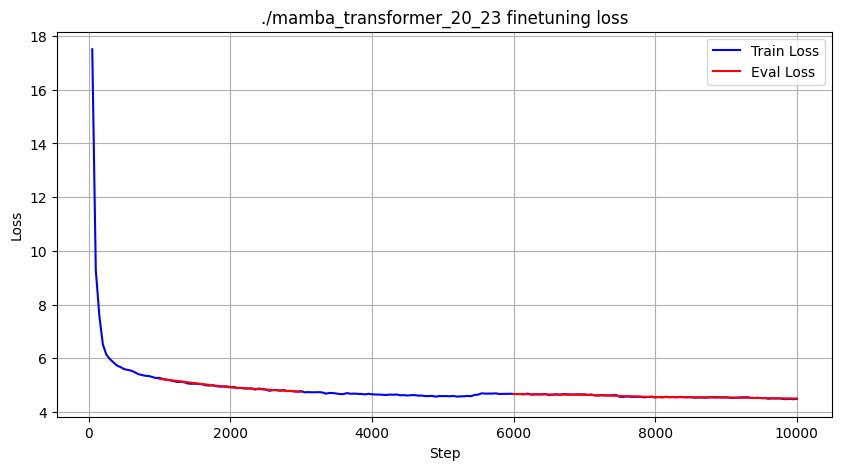

In [1]:
import os
import json
import matplotlib.pyplot as plt

root_folder = './mamba_transformer_20_23'
checkpoint = 'checkpoint-10000'
train_losses = []
train_steps = []
eval_losses = []
eval_steps = []

json_path = os.path.join(root_folder, checkpoint, 'trainer_state.json')
if os.path.exists(json_path):
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

        for t in data['log_history']:
            if 'eval_loss' in t:
                eval_losses.append(t['eval_loss'])
                eval_steps.append(t['step'])
            else:
                train_losses.append(t['loss'])
                train_steps.append(t['step'])

# Plotting the losses
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(train_steps, train_losses, label='Train Loss', color='blue')  # Plot training losses
plt.plot(eval_steps, eval_losses, label='Eval Loss', color='red')  # Plot evaluation losses
plt.xlabel('Step')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title(root_folder + ' finetuning loss')  # Title of the plot
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add grid for better readability of the plot
plt.show()  # Display the plot